In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import scikit_posthocs as sp

In [2]:
data = pd.read_csv('behavioral_difficulty.csv')
data.head()

,Are you still going to school?,Do you have any other children living in your house with you?,How many people live in your home with you (including adults)?,What year are you in now?,Gender,1. What did you eat for breakfast YESTERDAY?,2. Did you eat any fruit and vegetables YESTERDAY?,3. How many times did you brush your teeth YESTERDAY?,"6. In the last 7 days, how many days did you do sports or exercise for at least 1 hour in total. This includes doing any activities (including online activities) or playing sports where your heart beat faster, you breathed faster and you felt warmer?","7. In the last 7 days, how many days did you watch TV/play online games/use the internet etc. for 2 or more hours a day (in total)?",...,"24. Remember, there are no right or wrong answers, just pick which is right for you. [I get very angry]","24. Remember, there are no right or wrong answers, just pick which is right for you. [I lose my temper]","24. Remember, there are no right or wrong answers, just pick which is right for you. [I hit out when I am angry]","24. Remember, there are no right or wrong answers, just pick which is right for you. [I do things to hurt people]","24. Remember, there are no right or wrong answers, just pick which is right for you. [I am calm]","24. Remember, there are no right or wrong answers, just pick which is right for you. [I break things on purpose]","25. Are you able to keep in touch with your family that you don't live with? (grand parents, Uncle, Aunt, Cousins, etc)",26. Are you able to keep in touch with your friends?,hours of sleep had last night,behavioral difficulty category
0,1,1,3,2,0,122,2,2,4,4,...,0,0,0,1,0,0,0,1,8.5,0
1,1,1,3,1,1,55,0,2,4,4,...,0,0,1,0,1,0,2,1,10.0,0
2,1,1,4,2,0,21,3,2,4,4,...,0,0,1,0,1,0,2,1,8.0,0
3,1,1,3,1,0,122,3,2,4,1,...,0,0,0,0,1,0,2,1,12.0,0
4,1,1,4,1,1,55,3,1,4,1,...,0,0,0,0,0,0,2,1,11.0,0


In [3]:
# Create a dictionary for renaming columns to concise names
renamed_columns = {
    'Are you still going to school?': 'school_status',
    'Do you have any other children living in your house with you?': 'other_kids_home',
    'How many people live in your home with you (including adults)?': 'people_home',
    'What year are you in now?': 'school_year',
    'Gender': 'gender',
    '1. What did you eat for breakfast YESTERDAY?': 'breakfast',
    '2. Did you eat any fruit and vegetables YESTERDAY? ': 'fruit_veg',
    '3. How many times did you brush your teeth YESTERDAY?': 'teeth_brush',
    '6. In the last 7 days, how many days did you do sports or exercise for at least 1 hour in total. This includes doing any activities (including online activities) or playing sports where your heart beat faster, you breathed faster and you felt warmer?': 'exercise_days',
    '7. In the last 7 days, how many days did you watch TV/play online games/use the internet etc. for 2 or more hours a day (in total)?': 'screen_time_days',
    '8. In the last 7 days, how many days did you feel tired?': 'tired_days',
    '9. In the last 7 days, how many days did you feel like you could concentrate/pay attention well on your school work?': 'concentration_days',
    '10. In the last 7 days, how many days did you drink at least one fizzy drink (e.g. coke, sprite, thumsup)?': 'fizzy_drink_days',
    '11. In the last 7 days, how many days did you eat at least one sugary snack (e.g. chocolate bar, sweets)?': 'sugary_snack_days',
    '12. In the last 7 days, how many days did you eat take away foods (e.g. Chinese takeaway)?': 'takeaway_days',
    '13. On a scale of 0 to 10 (0 being not very safe and 10 being very safe), how safe do you feel playing in your area?': 'play_safety',
    '14. From your house, can you easily walk to a park (for example a field or grassy area)?': 'park_access',
    '15. From your house, can you easily walk to somewhere you can play?': 'play_area_access',
    '16. Do you have a garden?': 'garden',
    '17. How often do you go out to play outside?': 'play_frequency',
    '18. Do you have enough time for play?': 'play_time',
    '19. What type of places do you play in?': 'play_places',
    '20. Can you play in all the places you would like to?': 'play_places_access',
    '21. Do you have somewhere at home where you have space to relax?': 'relax_space',
    '22. Tell us if you agree or disagree with the following: [I am doing well with my school work]': 'school_work',
    '22. Tell us if you agree or disagree with the following: [I feel part of my school community]': 'school_community',
    '22. Tell us if you agree or disagree with the following: [I have lots of choice over things that are important to me]': 'choices',
    "22. Tell us if you agree or disagree with the following: [There are lots of things I'm good at]": 'skills',
    'Your Health ': 'health',
    'Your School': 'school',
    'Your Family': 'family',
    'Your Friends': 'friends',
    'Your Appearance (how you look)': 'appearance',
    'Your Life': 'life',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I feel lonely]': '24_I_feel_lonely',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I cry a lot]': '24_i_cry_a_lot',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I am unhappy]': '24_iam_unhappy',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I feel nobody likes me]': '24_nobody_likes_me',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I worry a lot]': '24_i_worry_a_lot',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I have problems sleeping]': '24_i_have_sleep_issues',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I wake up in the night]': '24_wake_up_in_the night',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I am shy]': '24_iam_shy',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I feel scared]': '24_i_feel_scared',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I worry when I am at school]': '24_i_worry_at_school',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I get very angry]': '24_i_get_angry',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I lose my temper]': '24_i_loose_my_temper',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I hit out when I am angry]': '24_i_hit_when_angry',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I do things to hurt people]': '24_i_hurt_others',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I am calm]': '24_iam_calm',
    '24. Remember, there are no right or wrong answers, just pick which is right for you. [I break things on purpose]': '24_i_break_things',
    "25. Are you able to keep in touch with your family that you don't live with? (grand parents, Uncle, Aunt, Cousins, etc)": 'family_contact',
    '26. Are you able to keep in touch with your friends?': 'friends_contact',
    'hours of sleep had last night': 'hours_sleep',
    'behavioral difficulty category': 'behavior_difficulty'
}

# Rename columns
data.rename(columns=renamed_columns, inplace=True)

# Display renamed columns
data.columns.tolist()


['school_status',
 'other_kids_home',
 'people_home',
 'school_year',
 'gender',
 'breakfast',
 'fruit_veg',
 'teeth_brush',
 'exercise_days',
 'screen_time_days',
 'tired_days',
 'concentration_days',
 'fizzy_drink_days',
 'sugary_snack_days',
 'takeaway_days',
 'play_safety',
 'park_access',
 'play_area_access',
 'garden',
 'play_frequency',
 'play_time',
 'play_places',
 'play_places_access',
 'relax_space',
 'school_work',
 'school_community',
 'choices',
 'skills',
 'health',
 'school',
 'family',
 'friends',
 'appearance',
 'life',
 '24_I_feel_lonely',
 '24_i_cry_a_lot',
 '24_iam_unhappy',
 '24_nobody_likes_me',
 '24_i_worry_a_lot',
 '24_i_have_sleep_issues',
 '24_wake_up_in_the night',
 '24_iam_shy',
 '24_i_feel_scared',
 '24_i_worry_at_school',
 '24_i_get_angry',
 '24_i_loose_my_temper',
 '24_i_hit_when_angry',
 '24_i_hurt_others',
 '24_iam_calm',
 '24_i_break_things',
 'family_contact',
 'friends_contact',
 'hours_sleep',
 'behavior_difficulty']

In [4]:
data.to_csv('behavioral_difficulty_renamed_columns.csv')

#### # Calculate the distribution of the 'behavioral_difficulty' feature

In [5]:
# Calculate the distribution of the 'behavioral_difficulty' feature
behavioral_difficulty_distribution = data['behavior_difficulty'].value_counts(normalize=True) * 100

# Display the distribution with class labels
class_distribution = {
    'Class 0 (Expected)': behavioral_difficulty_distribution.get(0, 0),
    'Class 1 (Borderline)': behavioral_difficulty_distribution.get(1, 0),
    'Class 2 (Significant)': behavioral_difficulty_distribution.get(2, 0)
}

# Print the results
for class_label, percentage in class_distribution.items():
    print(f"{class_label}: {percentage:.2f}%")


Class 0 (Expected): 88.12%
Class 1 (Borderline): 5.30%
Class 2 (Significant): 6.57%


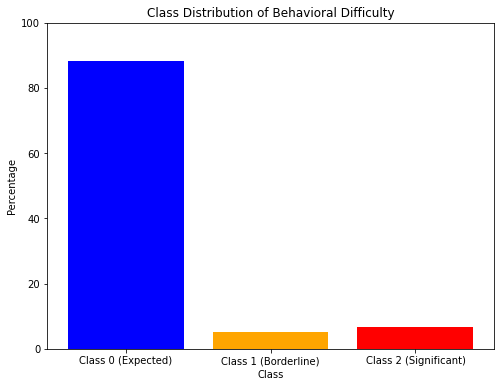

In [6]:
# Visualize the class distribution
labels = list(class_distribution.keys())
sizes = list(class_distribution.values())

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['blue', 'orange', 'red'])
plt.title('Class Distribution of Behavioral Difficulty')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.ylim(0, 100)
plt.show()

### Hypothesis Testing - Kruskal-Wallis H Test

### 1. Lifestyle and Behavioral Difficulties

#### 1.1. hours of sleep and behavior_difficulty

In [8]:
# Perform Kruskal-Wallis H Test on Lifestyle Features (e.g., 'hours of sleep had last night')
lifestyle_feature = data['hours_sleep']
kwh_result = kruskal(
    data[data['behavior_difficulty'] == 0]['hours_sleep'],
    data[data['behavior_difficulty'] == 1]['hours_sleep'],
    data[data['behavior_difficulty'] == 2]['hours_sleep']
)

print(f"Kruskal-Wallis H Test result for {lifestyle_feature}: H-statistic = {kwh_result.statistic}, p-value = {kwh_result.pvalue}")

Kruskal-Wallis H Test result for 0       8.5
1      10.0
2       8.0
3      12.0
4      11.0
       ... 
938    10.5
939    11.0
940     8.0
941    11.5
942    10.5
Name: hours_sleep, Length: 943, dtype: float64: H-statistic = 17.393944437192072, p-value = 0.00016709096076394383


In [75]:
lifestyle_feature = data['hours_sleep']
kwh_result = kruskal(
    data[data['24_i_have_sleep_issues'] == 0]['hours_sleep'],
    data[data['24_i_have_sleep_issues'] == 1]['hours_sleep'],
    data[data['24_i_have_sleep_issues'] == 2]['hours_sleep']
)

print(f"Kruskal-Wallis H Test result for {lifestyle_feature}: H-statistic = {kwh_result.statistic}, p-value = {kwh_result.pvalue}")

Kruskal-Wallis H Test result for 0       8.5
1      10.0
2       8.0
3      12.0
4      11.0
       ... 
938    10.5
939    11.0
940     8.0
941    11.5
942    10.5
Name: hours_sleep, Length: 943, dtype: float64: H-statistic = 19.254424794749685, p-value = 6.591052632804123e-05


#### 1.2. Physical Activity and Behavioral Difficulties

In [9]:
# Perform Kruskal-Wallis H Test on Physical Activity (exercise_days) and Behavior (behavior_difficulty)
kwh_result = kruskal(
    data[data['behavior_difficulty'] == 0]['exercise_days'],
    data[data['behavior_difficulty'] == 1]['exercise_days'],
    data[data['behavior_difficulty'] == 2]['exercise_days']
)

# Output the result
print(kwh_result)

KruskalResult(statistic=5.189641787660818, pvalue=0.07465924680872978)


H-statistic: 5.19

p-value: 0.075

Interpretation:

Since the p-value (0.075) is greater than the standard significance level (
alpha =
0.05
α=0.05), we fail to reject the null hypothesis (
𝐻
0
H 
0
​
 ).
 
This indicates that there is no statistically significant difference in physical activity levels (exercise_days) across the groups of behavioral difficulties (behavior_difficulty).

#### 1.3. Diet and Behavior

In [10]:
# Perform Kruskal-Wallis H Test on Diet (fruit_veg) and Behavior (behavior_difficulty)
kwh_diet_result = kruskal(
    data[data['behavior_difficulty'] == 0]['fruit_veg'],
    data[data['behavior_difficulty'] == 1]['fruit_veg'],
    data[data['behavior_difficulty'] == 2]['fruit_veg']
)

# Output the result
print(kwh_diet_result)


KruskalResult(statistic=0.7080448014032052, pvalue=0.701859245039784)


* This indicates that there is no statistically significant difference in diet (fruit_veg) across the groups of behavioral difficulties (behavior_difficulty).

### 2. Emotional Well-being and Environmental Factors

#### 2.1. play_area_access and behavior_difficulty

In [11]:
# Rename the column in the dataset
data.rename(columns=renamed_columns, inplace=True)

# Perform Kruskal-Wallis H Test on Access to Play Areas (play_area_access) and behavior_difficulty
kwh_play_access_result = kruskal(
    data[data['behavior_difficulty'] == 0]['play_area_access'],
    data[data['behavior_difficulty'] == 1]['play_area_access'],
    data[data['behavior_difficulty'] == 2]['play_area_access']
)

# Output the result
print(kwh_play_access_result)


KruskalResult(statistic=1.430325554590332, pvalue=0.48911248890813186)


* This indicates that there is no statistically significant difference in access to play areas (play_area_access) across the groups of behavioral difficulties (behavior_difficulty).

#### 2.2. family_contact and behavior_difficulty

In [12]:
# Perform Kruskal-Wallis H Test on Family Support (family_contact) and Behavioral Difficulty (behavior_difficulty)
kwh_family_support_result = kruskal(
    data[data['behavior_difficulty'] == 0]['family_contact'],
    data[data['behavior_difficulty'] == 1]['family_contact'],
    data[data['behavior_difficulty'] == 2]['family_contact']
)

# Output the result
print(kwh_family_support_result)


KruskalResult(statistic=4.60247123361647, pvalue=0.10013503871385224)


* This indicates that there is no statistically significant difference in family support (family_contact) across the groups of behavioral difficulties (behavior_difficulty).

### 3. Academic and Social Engagement

#### 3.1. school_work and behavior_difficulty

In [13]:
# Perform Kruskal-Wallis H Test on School Performance (school_work) and Behavioral Difficulty (behavior_difficulty)
kwh_school_performance_result = kruskal(
    data[data['behavior_difficulty'] == 0]['school_work'],
    data[data['behavior_difficulty'] == 1]['school_work'],
    data[data['behavior_difficulty'] == 2]['school_work']
)

# Output the result
print(kwh_school_performance_result)

KruskalResult(statistic=0.7026010361881602, pvalue=0.703772225785247)


* This indicates that there is no statistically significant difference in school performance (school_work) across the groups of behavioral difficulties (behavior_difficulty).

#### 3.2. friends_contact and behavior_difficulty

In [14]:
# Perform Kruskal-Wallis H Test on Social Connectivity (friends_contact) and Behavioral Difficulty (behavior_difficulty)
kwh_social_connectivity_result = kruskal(
    data[data['behavior_difficulty'] == 0]['friends_contact'],
    data[data['behavior_difficulty'] == 1]['friends_contact'],
    data[data['behavior_difficulty'] == 2]['friends_contact']
)

# Output the Kruskal-Wallis test result
print(kwh_social_connectivity_result)

KruskalResult(statistic=10.222217186846926, pvalue=0.006029395069507456)


* This indicates that there is a statistically significant difference in social connectivity (friends_contact) across the groups of behavioral difficulties (behavior_difficulty).

### 4. Physical Activity and Overall Well-being

#### 4.1. play_frequency and behavior_difficulty

In [15]:
# Perform Kruskal-Wallis H Test on Outdoor Play (play_frequency) and Behavioral Difficulty (behavior_difficulty)
kwh_outdoor_play_result = kruskal(
    data[data['behavior_difficulty'] == 0]['play_frequency'],
    data[data['behavior_difficulty'] == 1]['play_frequency'],
    data[data['behavior_difficulty'] == 2]['play_frequency']
)

# Output the Kruskal-Wallis test result
print(kwh_outdoor_play_result)

KruskalResult(statistic=3.600420394395891, pvalue=0.165264146509892)


* This indicates that there is no statistically significant difference in outdoor play frequency across the groups of behavioral difficulties.

#### 4.2. exercise_days and behavior_difficulty

In [16]:
# Perform Kruskal-Wallis H Test on Exercise (exercise_days) and Emotional Health (behavior_difficulty)
kwh_exercise_emotional_health_result = kruskal(
    data[data['behavior_difficulty'] == 0]['exercise_days'],
    data[data['behavior_difficulty'] == 1]['exercise_days'],
    data[data['behavior_difficulty'] == 2]['exercise_days']
)

# Output the Kruskal-Wallis test result
print(kwh_exercise_emotional_health_result)

KruskalResult(statistic=5.189641787660818, pvalue=0.07465924680872978)


### 5. Other categories

#### 5.1. Perform Kruskal-Wallis H Test for Screen Time and Behavioral Difficulty

In [17]:
# Perform Kruskal-Wallis H Test for Screen Time, Sleep Patterns, and Dietary Habits vs Behavioral Difficulty

# Screen Time (screen_time_days)
kwh_screen_time_result = kruskal(
    data[data['behavior_difficulty'] == 0]['screen_time_days'],
    data[data['behavior_difficulty'] == 1]['screen_time_days'],
    data[data['behavior_difficulty'] == 2]['screen_time_days']
)




# Display the results
print(f"Screen Time vs Behavioral Difficulty: {kwh_screen_time_result} ")


Screen Time vs Behavioral Difficulty: KruskalResult(statistic=2.2138017987258403, pvalue=0.33058188170969405) 


* Interpretation: No statistically significant difference in screen time across behavioral difficulty group.

#### 5.2. Gender vs behaviora difficulty

In [18]:
# Perform Kruskal-Wallis H Test on Gender (gender) and Behavioral Difficulty (behavior_difficulty)
kwh_gender_result = kruskal(
    data[data['behavior_difficulty'] == 0]['gender'],
    data[data['behavior_difficulty'] == 1]['gender'],
    data[data['behavior_difficulty'] == 2]['gender']
)

# Display the result
print(kwh_gender_result)

KruskalResult(statistic=8.319854330171081, pvalue=0.015608694736528326)


* This indicates that there is a statistically significant difference in gender distribution across the behavioral difficulty groups.

#### 5.3 Screen Time and hours_sleep

In [19]:
# Screen Time (screen_time_days)
kwh_screen_time_result = kruskal(
    data[data['screen_time_days'] == 0]['hours_sleep'],
    data[data['screen_time_days'] == 1]['hours_sleep'],
    data[data['screen_time_days'] == 2]['hours_sleep'],
    data[data['screen_time_days'] == 3]['hours_sleep'],
    data[data['screen_time_days'] == 4]['hours_sleep']
)




# Display the results
print(f"Screen Time vs hours_sleep: {kwh_screen_time_result} ")


Screen Time vs hours_sleep: KruskalResult(statistic=37.96412018653989, pvalue=1.1398200890905409e-07) 


Screen Time vs hours_sleep: KruskalResult(statistic=4.8966878461518535, pvalue=0.29806317163888274) 


### Correlation Analysis

In [20]:
# Filter columns related to emotional and behavioral features
emotional_behavioral_columns = [col for col in data.columns if col.startswith('24')]

# Separate emotional and behavioral difficulty columns
emotional_difficulty_columns = emotional_behavioral_columns[:10]
behavioral_difficulty_columns = emotional_behavioral_columns[10:16]

# Perform correlation analysis
correlation_matrix = data[emotional_difficulty_columns + behavioral_difficulty_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                         24_I_feel_lonely  24_i_cry_a_lot  24_iam_unhappy  \
24_I_feel_lonely                 1.000000        0.215227        0.359504   
24_i_cry_a_lot                   0.215227        1.000000        0.312117   
24_iam_unhappy                   0.359504        0.312117        1.000000   
24_nobody_likes_me               0.365907        0.270252        0.340638   
24_i_worry_a_lot                 0.238325        0.306527        0.266568   
24_i_have_sleep_issues           0.172024        0.144978        0.219873   
24_wake_up_in_the night          0.108591        0.160008        0.201791   
24_iam_shy                       0.150084        0.142955        0.171685   
24_i_feel_scared                 0.272599        0.313161        0.370995   
24_i_worry_at_school             0.279164        0.272893        0.283060   
24_i_get_angry                   0.210707        0.227907        0.316679   
24_i_loose_my_temper             0.192537        0.184708        0.256316   

#### Heatmap

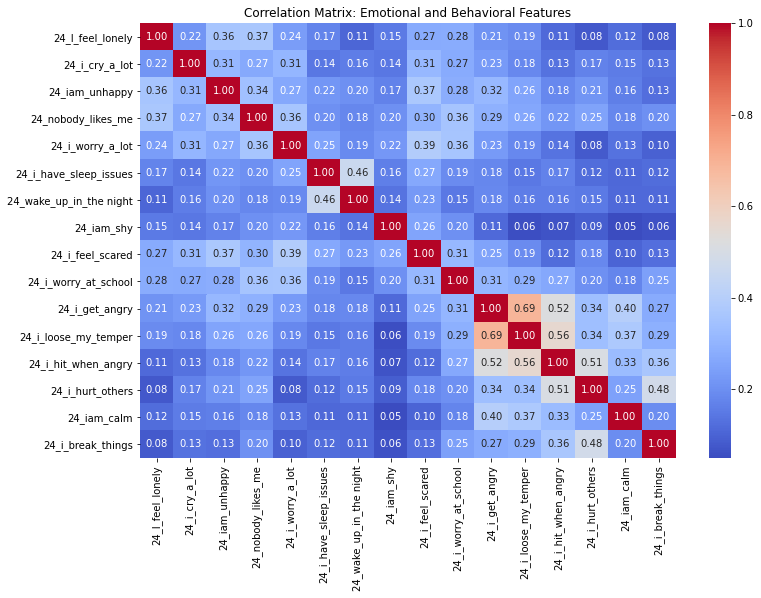

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Correlation Matrix: Emotional and Behavioral Features")
plt.show()


#### Top 10 correlated features

In [22]:
# Unstack the correlation matrix to create pairs of features with their correlation values
correlation_pairs = correlation_matrix.unstack()

# Sort the pairs by absolute correlation values in descending order
sorted_correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

# Filter out self-correlations (correlation of a feature with itself is always 1)
top_correlations = sorted_correlation_pairs[sorted_correlation_pairs < 1].nlargest(10)

# Display the top correlated feature pairs
print(top_correlations)


24_i_get_angry        24_i_loose_my_temper    0.688876
24_i_loose_my_temper  24_i_get_angry          0.688876
24_i_hit_when_angry   24_i_loose_my_temper    0.561261
24_i_loose_my_temper  24_i_hit_when_angry     0.561261
24_i_hit_when_angry   24_i_get_angry          0.518956
24_i_get_angry        24_i_hit_when_angry     0.518956
24_i_hit_when_angry   24_i_hurt_others        0.509556
24_i_hurt_others      24_i_hit_when_angry     0.509556
24_i_break_things     24_i_hurt_others        0.480589
24_i_hurt_others      24_i_break_things       0.480589
dtype: float64


Here are the top 10 correlated feature pairs from the emotional and behavioral features:

* 24_i_get_angry and 24_i_loose_my_temper: 0.6889
* 24_i_loose_my_temper and 24_i_get_angry: 0.6889
* 24_i_hit_when_angry and 24_i_loose_my_temper: 0.5613
* 24_i_loose_my_temper and 24_i_hit_when_angry: 0.5613
* 24_i_hit_when_angry and 24_i_get_angry: 0.5190
* 24_i_get_angry and 24_i_hit_when_angry: 0.5190
* 24_i_hit_when_angry and 24_i_hurt_others: 0.5096
* 24_i_hurt_others and 24_i_hit_when_angry: 0.5096
* 24_i_break_things and 24_i_hurt_others: 0.4806
*24_i_hurt_others and 24_i_break_things: 0.4806

These correlations suggest strong relationships, particularly among behavioral features such as anger and associated behaviors.

#### top 20 correlated features with behavior_difficulty

In [23]:
# Calculate correlations with the 'behavior_difficulty' column
behavior_difficulty_correlations = data.corr()['behavior_difficulty'].sort_values(ascending=False)

# Exclude self-correlation and extract the top 20 correlated features
top_20_correlations = behavior_difficulty_correlations[behavior_difficulty_correlations.index != 'behavior_difficulty'].head(20)

# Display the top 20 correlations
print(top_20_correlations)


24_i_hit_when_angry        0.614382
24_i_hurt_others           0.592195
24_i_break_things          0.581728
24_i_loose_my_temper       0.479021
24_i_get_angry             0.473561
24_i_worry_at_school       0.429461
24_nobody_likes_me         0.310822
24_i_feel_scared           0.255447
24_iam_shy                 0.246884
24_iam_calm                0.240678
24_iam_unhappy             0.218260
24_wake_up_in_the night    0.207112
24_i_have_sleep_issues     0.197487
24_i_worry_a_lot           0.182836
24_i_cry_a_lot             0.172906
24_I_feel_lonely           0.170496
tired_days                 0.148579
fizzy_drink_days           0.084043
school_community           0.047252
screen_time_days           0.026976
Name: behavior_difficulty, dtype: float64


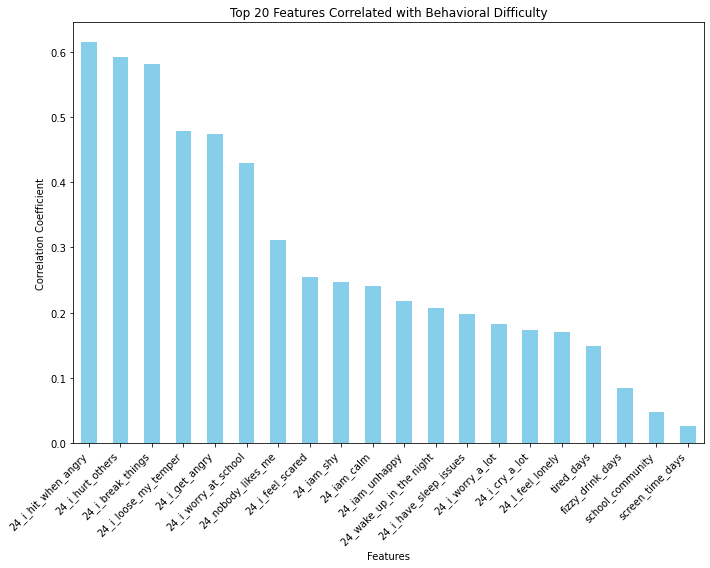

In [24]:
import matplotlib.pyplot as plt

# Visualization: Top 20 Correlated Features with behavior_difficulty
plt.figure(figsize=(10, 8))
top_20_correlations.plot(kind='bar', color='skyblue')
plt.title('Top 20 Features Correlated with Behavioral Difficulty')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### EDA-Extension

#### 1. Well-being factors

In [36]:
wellbeing = data[['health','school', 'family', 'friends']]
wellbeing

,health,school,family,friends
0,8,5,10,10
1,7,9,10,8
2,9,6,10,10
3,10,9,10,10
4,10,6,10,5
...,...,...,...,...
938,8,8,10,10
939,5,10,10,9
940,5,7,9,9
941,9,10,10,9


In [40]:
wellbeing_corr_matrix = wellbeing.corr()
wellbeing_corr_matrix

,health,school,family,friends
health,1.000000,0.248968,0.305546,0.304945
school,0.248968,1.000000,0.239853,0.414107
family,0.305546,0.239853,1.000000,0.382256
friends,0.304945,0.414107,0.382256,1.000000


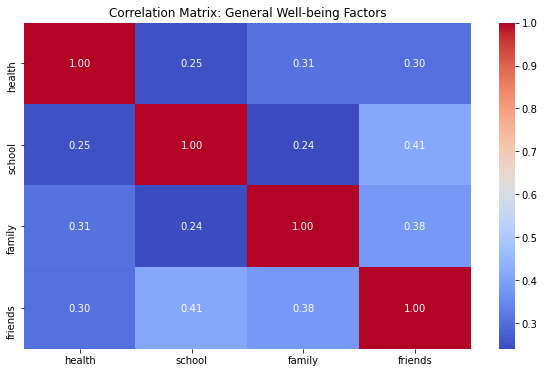

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(wellbeing_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Correlation Matrix: General Well-being Factors")
plt.show()

In [32]:
data.columns

Index(['school_status', 'other_kids_home', 'people_home', 'school_year',
       'gender', 'breakfast', 'fruit_veg', 'teeth_brush', 'exercise_days',
       'screen_time_days', 'tired_days', 'concentration_days',
       'fizzy_drink_days', 'sugary_snack_days', 'takeaway_days', 'play_safety',
       'park_access', 'play_area_access', 'garden', 'play_frequency',
       'play_time', 'play_places', 'play_places_access', 'relax_space',
       'school_work', 'school_community', 'choices', 'skills', 'health',
       'school', 'family', 'friends', 'appearance', 'life', '24_I_feel_lonely',
       '24_i_cry_a_lot', '24_iam_unhappy', '24_nobody_likes_me',
       '24_i_worry_a_lot', '24_i_have_sleep_issues', '24_wake_up_in_the night',
       '24_iam_shy', '24_i_feel_scared', '24_i_worry_at_school',
       '24_i_get_angry', '24_i_loose_my_temper', '24_i_hit_when_angry',
       '24_i_hurt_others', '24_iam_calm', '24_i_break_things',
       'family_contact', 'friends_contact', 'hours_sleep',
       'be

#### 2. Emotional Difficulties

In [57]:
data['24_i_worry_a_lot']

0      0
1      1
2      0
3      0
4      1
      ..
938    1
939    1
940    1
941    0
942    0
Name: 24_i_worry_a_lot, Length: 943, dtype: int64

Class 0 (Expected): 34.78%
Class 1 (Borderline): 55.14%
Class 2 (Significant): 10.07%


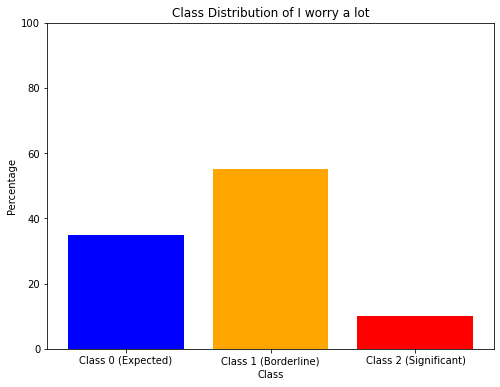

In [67]:
# Calculate the distribution of the 'behavioral_difficulty' feature
worry_distribution = pd.DataFrame(data['24_i_worry_a_lot']).value_counts(normalize=True) * 100

# Display the distribution with class labels
class_distribution = {
    'Class 0 (Expected)': worry_distribution.get(0, 0),
    'Class 1 (Borderline)': worry_distribution.get(1, 0),
    'Class 2 (Significant)': worry_distribution.get(2, 0)
}

# Print the results
for class_label, percentage in class_distribution.items():
    print(f"{class_label}: {percentage:.2f}%")
    
# Visualize the class distribution
labels = list(class_distribution.keys())
sizes = list(class_distribution.values())

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['blue', 'orange', 'red'])
plt.title('Class Distribution of I worry a lot')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.ylim(0, 100)
plt.show()

In [ ]:
# correlation between loneliness, crying, and worrying

In [62]:
emotional_factors = data[['24_I_feel_lonely', '24_i_cry_a_lot', '24_i_worry_a_lot']]
emotional_factors

,24_I_feel_lonely,24_i_cry_a_lot,24_i_worry_a_lot
0,0,0,0
1,1,1,1
2,0,0,0
3,0,1,0
4,0,0,1
...,...,...,...
938,1,1,1
939,1,1,1
940,1,1,1
941,1,0,0


In [63]:
emotional_corr_matrix = emotional_factors.corr()
emotional_corr_matrix

,24_I_feel_lonely,24_i_cry_a_lot,24_i_worry_a_lot
24_I_feel_lonely,1.000000,0.215227,0.238325
24_i_cry_a_lot,0.215227,1.000000,0.306527
24_i_worry_a_lot,0.238325,0.306527,1.000000


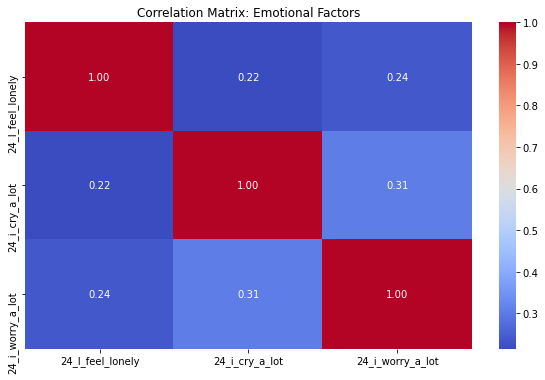

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(emotional_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Correlation Matrix: Emotional Factors")
plt.show()

#### Behavioral factors

Class 0 (Expected): 90.88%
Class 1 (Borderline): 8.17%
Class 2 (Significant): 0.95%


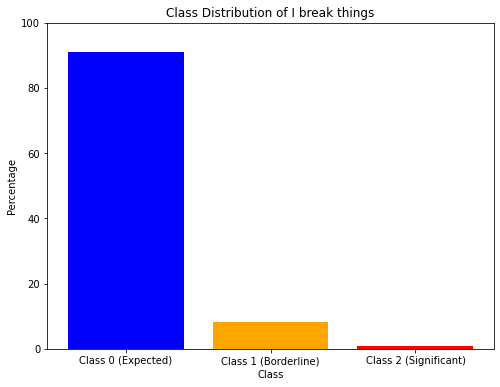

In [68]:
# Calculate the distribution of the 'behavioral_difficulty' feature
worry_distribution = pd.DataFrame(data['24_i_break_things']).value_counts(normalize=True) * 100

# Display the distribution with class labels
class_distribution = {
    'Class 0 (Expected)': worry_distribution.get(0, 0),
    'Class 1 (Borderline)': worry_distribution.get(1, 0),
    'Class 2 (Significant)': worry_distribution.get(2, 0)
}

# Print the results
for class_label, percentage in class_distribution.items():
    print(f"{class_label}: {percentage:.2f}%")
    
# Visualize the class distribution
labels = list(class_distribution.keys())
sizes = list(class_distribution.values())

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['blue', 'orange', 'red'])
plt.title('Class Distribution of I break things')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.ylim(0, 100)
plt.show()

Class 0 (Expected): 44.01%
Class 1 (Borderline): 51.64%
Class 2 (Significant): 4.35%


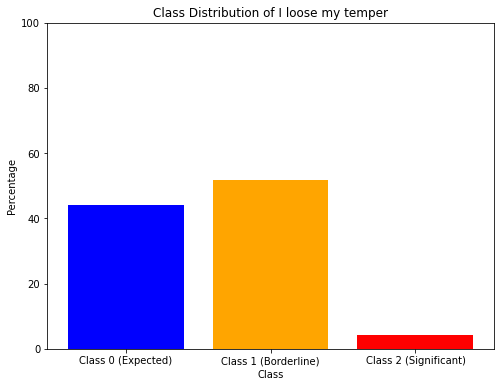

In [69]:
# Calculate the distribution of the 'behavioral_difficulty' feature
worry_distribution = pd.DataFrame(data['24_i_loose_my_temper']).value_counts(normalize=True) * 100

# Display the distribution with class labels
class_distribution = {
    'Class 0 (Expected)': worry_distribution.get(0, 0),
    'Class 1 (Borderline)': worry_distribution.get(1, 0),
    'Class 2 (Significant)': worry_distribution.get(2, 0)
}

# Print the results
for class_label, percentage in class_distribution.items():
    print(f"{class_label}: {percentage:.2f}%")
    
# Visualize the class distribution
labels = list(class_distribution.keys())
sizes = list(class_distribution.values())

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['blue', 'orange', 'red'])
plt.title('Class Distribution of I loose my temper')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.ylim(0, 100)
plt.show()